In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('../data/kandidater_data.csv').dropna()

In [3]:
sorted(list(df.CurrentPartyCode.unique()))

['A', 'B', 'C', 'D', 'F', 'I', 'K', 'M', 'O', 'Q', 'V', 'Å', 'Æ', 'Ø']

In [4]:
df_a = df[df.CurrentPartyCode == "A"]
df_b = df[df.CurrentPartyCode == "B"]
df_c = df[df.CurrentPartyCode == "C"]
df_d = df[df.CurrentPartyCode == "D"]
df_f = df[df.CurrentPartyCode == "F"]
df_i = df[df.CurrentPartyCode == "I"]
df_k = df[df.CurrentPartyCode == "K"]
df_m = df[df.CurrentPartyCode == "M"]
df_o = df[df.CurrentPartyCode == "O"]
df_q = df[df.CurrentPartyCode == "Q"]
df_v = df[df.CurrentPartyCode == "V"]
df_å = df[df.CurrentPartyCode == "Å"]
df_æ = df[df.CurrentPartyCode == "Æ"]
df_ø = df[df.CurrentPartyCode == "Ø"]

In [5]:
X_a = df_a[[str(i) for i in range(1, 26)]]
X_b = df_b[[str(i) for i in range(1, 26)]]
X_c = df_c[[str(i) for i in range(1, 26)]]
X_d = df_d[[str(i) for i in range(1, 26)]]
X_f = df_f[[str(i) for i in range(1, 26)]]
X_i = df_i[[str(i) for i in range(1, 26)]]
X_k = df_k[[str(i) for i in range(1, 26)]]
X_m = df_m[[str(i) for i in range(1, 26)]]
X_o = df_o[[str(i) for i in range(1, 26)]]
X_q = df_q[[str(i) for i in range(1, 26)]]
X_v = df_v[[str(i) for i in range(1, 26)]]
X_å = df_å[[str(i) for i in range(1, 26)]]
X_æ = df_æ[[str(i) for i in range(1, 26)]]
X_ø = df_ø[[str(i) for i in range(1, 26)]]

In [6]:
pca = PCA(n_components=1)

In [7]:
xt_a = pca.fit_transform(X_a)
a = pca.explained_variance_ratio_

In [8]:
xt_b = pca.fit_transform(X_b)
b = pca.explained_variance_ratio_

In [9]:
xt_c = pca.fit_transform(X_c)
c = pca.explained_variance_ratio_

In [10]:
xt_d = pca.fit_transform(X_d)
d = pca.explained_variance_ratio_

In [11]:
xt_f = pca.fit_transform(X_f)
f = pca.explained_variance_ratio_

In [12]:
xt_i = pca.fit_transform(X_i)
i = pca.explained_variance_ratio_

In [13]:
i

array([0.16160865])

In [14]:
xt_k = pca.fit_transform(X_k)
k = pca.explained_variance_ratio_

In [15]:
xt_m = pca.fit_transform(X_m)
m = pca.explained_variance_ratio_

In [16]:
xt_o = pca.fit_transform(X_o)
o = pca.explained_variance_ratio_

In [17]:
xt_q = pca.fit_transform(X_q)
q = pca.explained_variance_ratio_

In [18]:
xt_v = pca.fit_transform(X_v)
v = pca.explained_variance_ratio_

In [19]:
xt_å = pca.fit_transform(X_å)
å = pca.explained_variance_ratio_

In [20]:
xt_æ = pca.fit_transform(X_æ)
æ = pca.explained_variance_ratio_

In [21]:
xt_ø = pca.fit_transform(X_ø)
ø = pca.explained_variance_ratio_

In [22]:
party_variance_ratio = [i for i in (a,b,c,d,f,i,k,m,o,q,v,å,æ,ø)]
#party_variance_ratio = [i for i in party_variance_ratio]

In [23]:
party_variance_ratio

[array([0.24549946]),
 array([0.15596916]),
 array([0.22565764]),
 array([0.25672015]),
 array([0.1905409]),
 array([0.16160865]),
 array([0.13088596]),
 array([0.1684402]),
 array([0.17503837]),
 array([0.39090118]),
 array([0.16648633]),
 array([0.15449765]),
 array([0.20055789]),
 array([0.21182754])]

In [24]:
letters = sorted(list(df.CurrentPartyCode.unique()))


dictionary = {letters[i]: party_variance_ratio[i] for i in range(len(party_variance_ratio))}

In [25]:
dictionary

{'A': array([0.24549946]),
 'B': array([0.15596916]),
 'C': array([0.22565764]),
 'D': array([0.25672015]),
 'F': array([0.1905409]),
 'I': array([0.16160865]),
 'K': array([0.13088596]),
 'M': array([0.1684402]),
 'O': array([0.17503837]),
 'Q': array([0.39090118]),
 'V': array([0.16648633]),
 'Å': array([0.15449765]),
 'Æ': array([0.20055789]),
 'Ø': array([0.21182754])}

In [37]:
labels = df.CurrentPartyCode.unique()
colormap = {'A': '#A82721', 
            'O': '#EAC73E', 
            'V': '#254264', 
            'Ø': '#E6801A', 
            'I': '#3FB2BE', 
            'Å': '#2B8738', 
            'B': '#733280', 
            'F': '#E07EA8', 
            'C': '#96B226', 
            'D': '#127B7F', 
            'K': '#8B8474', 
            'Q': '#C49414', 
            'M': '#832B93', 
            'Æ': '#2C5877'}


C:\Users\Madshogenhaug\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  This is separate from the ipykernel package so we can avoid doing imports until


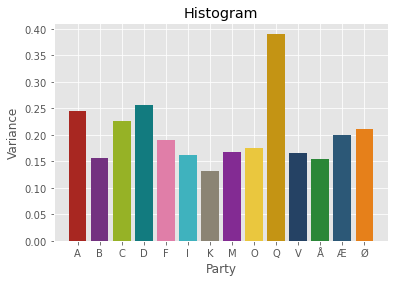

In [48]:
plt.style.use("ggplot")

values = [np.asscalar(val) for val in dictionary.values()]
keys = list(dictionary.keys())

fig, ax = plt.subplots()

ax.bar(keys, values, color=[colormap[key] for key in keys])

plt.title('')
plt.xlabel('Party')
plt.ylabel('Variance')

plt.show()